# Plotting and saving figures

In [ ]:
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
import matplotlib 
import seaborn as sns

## Figure 3

In [32]:
# Load data
path_data = "data_figures"
path_exps = os.path.join(path_data, "Figure3.csv")
exps = pd.read_csv(path_exps)

### Creating convenient dataframe for plot

In [35]:
# Duplicating data so we have one entry for Maximal and one for BFF

# Maximal
exps_plot1 = exps.drop(columns = ['BFF'])
exps_plot1.rename(columns = {'max' : 'circularity'}, inplace = True)
exps_plot1['Circularity Type'] = 'max'
# BFF
exps_plot2 = exps.drop(columns = ['max'])
exps_plot2.rename(columns = {'BFF' : 'circularity'}, inplace = True)
exps_plot2['Circularity Type'] = 'BFF'
exps_plot2
# Merge
exps_plot = pd.concat([exps_plot1, exps_plot2], ignore_index=True)

# Rename colums for aesthetics
exps_plot.rename(columns = {'average_weight' : 'Average Weight'}, inplace = True)
type_map = {'max': 'Maximal', 'BFF' : 'BFF'}
exps_plot['Circularity Type'] = exps_plot['Circularity Type'].map(type_map)

# Choose error for shaded regions
error = lambda x: (np.quantile(x, 0.25), np.quantile(x, 0.75)) 

### Ploting 

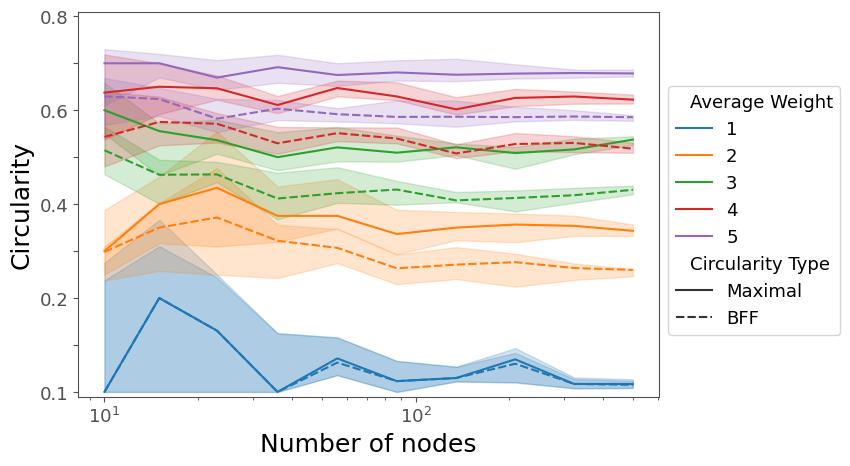

In [38]:
plt.rcParams['font.size']=13

fig, ax = plt.subplots(1, 1, figsize = (7.5,5))

ax = sns.lineplot(ax = ax, data=exps_plot, x="num_nodes", y="circularity", estimator=np.median, errorbar= error,  
                  hue= 'Average Weight', style = 'Circularity Type', palette = "tab10")
leg = ax.get_legend()
leg.set( bbox_to_anchor = (1,0.83)) # loc="center right", fontsize = font_size_lable

font_size_lable = 18
ax.set_xlabel('Number of nodes', fontsize = font_size_lable)
ax.set_ylabel('Circularity', fontsize = font_size_lable)

ax.set_xscale('log')
ax.set(ylim=(-0.01, 0.81))

color_box = '#505050' #grey
ax.set_yticks([i/10 for i in range(9)], [0.1,'', 0.2, '', 0.4, '', 0.6, '', 0.8], color = color_box)

# ax.spines['right'].set_visible(False)
pos = ['right', 'top', 'left', 'bottom']
for p in pos:
    ax.spines[p].set_color(color_box)

font_size_ticks = 13
ax.tick_params(axis= 'both',  labelsize =  font_size_ticks, colors = color_box, which = 'both' )

# Saving figure
dir_figures = "figures"
if not os.path.exists(dir_figures): # create dir if it doesn't exist
    os.makedirs(dir_figures)
path_figure = os.path.join(dir_figures, "Figure3.pdf")
plt.savefig(path_figure, format='pdf',bbox_inches='tight')

plt.show()

matplotlib.rcParams.update(matplotlib.rcParamsDefault)

## Figure 4

In [40]:
# Load data
path_exps = os.path.join(path_data, "Figure4.csv")
exps = pd.read_csv(path_exps)

### Creating convenient dataframe for plot

In [42]:
# Duplicating data so we have one entry for Maximal and one for BFF

# Maximal
exps_plot1 = exps.drop(columns = ['BFF'])
exps_plot1.rename(columns = {'max' : 'circularity'}, inplace = True)
exps_plot1['circularity_type'] = 'max'
# BFF
exps_plot2 = exps.drop(columns = ['max'])
exps_plot2.rename(columns = {'BFF' : 'circularity'}, inplace = True)
exps_plot2['circularity_type'] = 'BFF'
exps_plot2
# Merge
exps_plot_raw = pd.concat([exps_plot1, exps_plot2], ignore_index=True)
exps_plot = exps_plot_raw.groupby(['num_nodes','average_weight', 'circularity_type'], as_index = False).mean()
type_map = {'max': 'Maximal', 'BFF' : 'BFF'}
exps_plot['circularity_type'] = exps_plot['circularity_type'].map(type_map)

# Add directedness 
exps_plot['directedness'] = 1-exps_plot['circularity']

# Sliccing of the start plot 
exps_plot_50 = exps_plot[exps_plot['average_weight']< 50]

### Ploting 

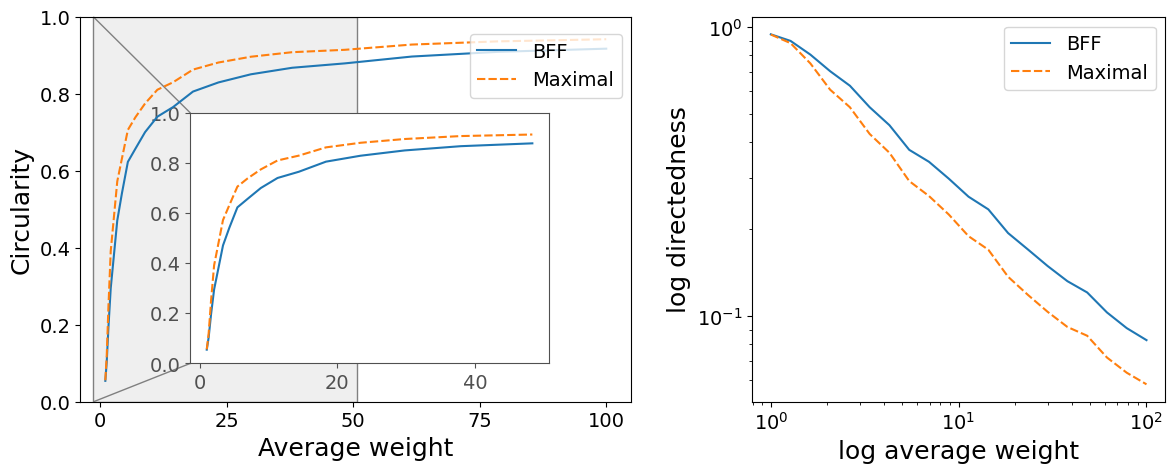

In [44]:
fig, ax = plt.subplots(1, 3, figsize=(14, 5), gridspec_kw={'width_ratios': [4,-0.05, 3]})
ax[1].set_visible(False)

i = 0
sns.lineplot(ax = ax[i], data=exps_plot, x="average_weight", y="circularity", hue= 'circularity_type', style = 'circularity_type', palette = "tab10")

font_size_legend = 14
ax[i].legend( ncol=1, loc="upper right", bbox_to_anchor = (0,-0.02,1,1), fontsize = font_size_legend)# handles, labels, loc="upper right"

font_size_lable = 18
ax[i].set_xlabel('Average weight', fontsize = font_size_lable)
ax[i].set_ylabel('Circularity', fontsize = font_size_lable)
ax[i].set_ylim(0,1)

font_size_ticks = 14
color_box = 'black'
ax[i].tick_params(axis= 'both',  labelsize =  font_size_ticks, colors = color_box, which = 'both' )
pos = ['right', 'top', 'left', 'bottom']
for p in pos:
    ax[i].spines[p].set_color(color_box)
ax[i].locator_params(axis='x', nbins=5) 
ax[i].locator_params(axis='y', nbins=6) 

zoom = ax[i].inset_axes([0.2,0.1,0.65,0.65], zorder =0)

sns.lineplot(ax = zoom, data=exps_plot_50, x="average_weight", y="circularity", hue= 'circularity_type', style = 'circularity_type', palette = "tab10")
zoom.get_legend().set_visible(False)
zoom.set_xlabel('')
zoom.set_ylabel('')
zoom.set_ylim(0,1)
zoom.locator_params(axis='x', nbins=4)

color_box_zoom = '#505050' # grey
zoom.tick_params(axis= 'both',  labelsize =  font_size_ticks, colors = color_box_zoom, which = 'both' )
pos = ['right', 'top', 'left', 'bottom']
for p in pos:
    zoom.spines[p].set_color(color_box_zoom)


from mpl_toolkits.axes_grid1.inset_locator import mark_inset
mark_inset(ax[i], zoom, loc1=2, loc2=3, facecolor="#e0e0e080", edgecolor="grey",zorder =0) #zorder

i = 2
sns.lineplot(ax = ax[i], data=exps_plot, x="average_weight", y='directedness', hue= 'circularity_type', style = 'circularity_type', palette = "tab10")

ax[i].legend( ncol=1,  fontsize = font_size_legend)
ax[i].set_xscale('log')
ax[i].set_yscale('log')
ax[i].set_xlabel('log average weight',fontsize = font_size_lable)
ax[i].set_ylabel('log directedness', fontsize = font_size_lable)

ax[i].tick_params(axis= 'both',  labelsize =  font_size_ticks, colors = color_box, which = 'both' )
pos = ['right', 'top', 'left', 'bottom']
for p in pos:
    ax[i].spines[p].set_color(color_box)

# Saving figure
path_figure = os.path.join(dir_figures, "Figure4.pdf")
plt.savefig(path_figure, format='pdf',bbox_inches='tight')

plt.show()

## Figure 5

In [48]:
# Load data
path_exps = os.path.join(path_data, "Figure5.csv")
exps = pd.read_csv(path_exps)

### Prepare data for plot
We bound above and below the number of nodes and the average degree of the data so that it can be depicted all in the same scale. For average degree there is a clear outlayer that we colour independently. 

In [51]:
# bounding data
exps_plot = exps.copy()
min_nodes = 200
max_nodes = 9000
min_degree = 1
max_degree = 5
exps_plot['num_nodes'] = exps_plot['num_nodes'].apply(lambda x : max(min(x,max_nodes), min_nodes))
exps_plot['average_degree'] = exps_plot['average_degree'].apply(lambda x : max(min(x,max_degree), min_degree))

# Outlayer
print(exps[exps["average_degree"]>4]["average_degree"])

# Color map
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

rocket = sns.cubehelix_palette(as_cmap=True)
rocket_points = rocket(np.linspace(0, 1, 400))
green = np.array([0, 153/256, 76/256, 1])
# Green only for outlayer
newcolors = np.concatenate(( rocket_points, np.array([green for i in range(100)])), axis=0)
newcmp = ListedColormap(newcolors)

116    6.409903
Name: average_degree, dtype: float64


### Legend
We generate a "fake" plot so that we get desired legend.

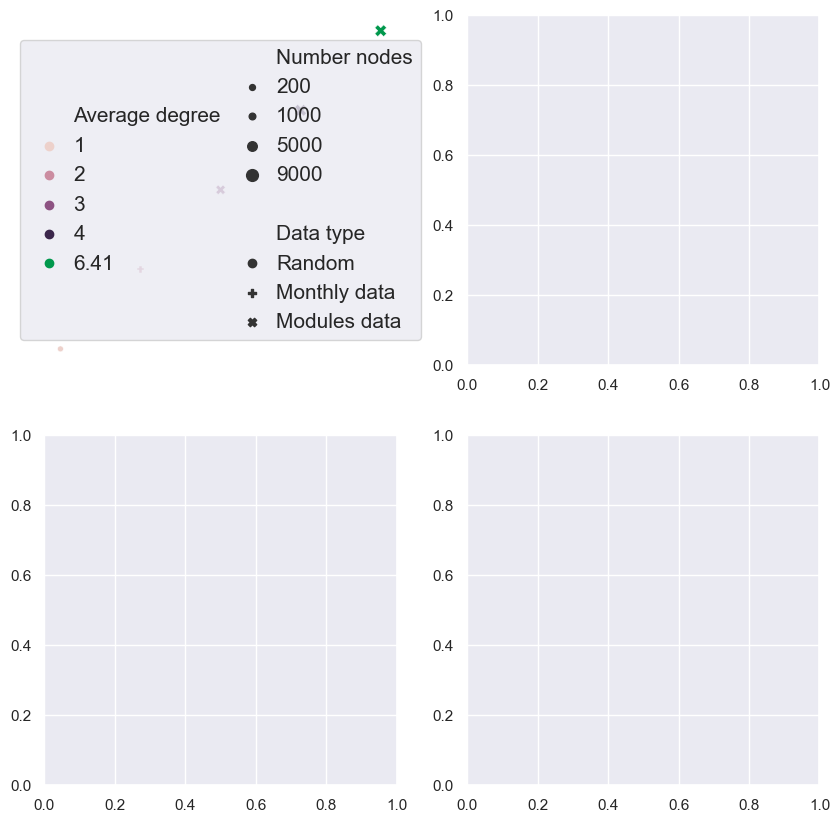

In [53]:
# parameters
sns.set_theme(style="darkgrid")
markers = {"Random" : "o", "Monthly data": "P", "Modules data": "X"}
hue_norm = (min_degree,max_degree)
size_norm = (min_nodes,max_nodes)
font_size_lable = 18
font_size_ticks = 15
font_size_legend = 15

# auxiliary data set to generate legend
d = {'Average degree': [1, 2, 3, 4, 5], 'Number nodes': [200, 1000, 5000, 9000, 9000], 
     'Data type' : ["Random", "Monthly data", "Modules data","Modules data","Modules data"],
    'circularity' : [1,2,3,4,5]}
df = pd.DataFrame(data=d)

fig, ax = plt.subplots(2, 2, figsize = (10,10))

sns.scatterplot(ax = ax[0,0], data=df, x='circularity', y='circularity', hue="Average degree", size = 'Number nodes', style = 'Data type', 
    hue_norm=hue_norm, size_norm = size_norm, markers = markers, palette = newcmp, legend="full" ) # , palette = newcmp

handles, labels = ax[0,0].get_legend_handles_labels()
labels [5] = 6.41 # Change 5 for specific value outlayer

# add empty space so that output in 2 colums is nice 
handles.insert(11, handles[0]); labels.insert(11, '')
handles.insert(6, handles[0]); labels.insert(6, '')
handles.insert(6, handles[0]); labels.insert(6, '')
handles.insert(0, handles[0]); labels.insert(0, '')
handles.insert(0, handles[0]); labels.insert(0, '')

# check in format we'll have
ax[0,0].axis('off')
ax[0,0].legend(handles, labels,  loc="center", fontsize = font_size_legend, ncol = 2, columnspacing=0.5, handletextpad=0.15,)#  borderpad=0.3# bbox_to_anchor=(1.02,0.5)

plt.show()

### Ploting

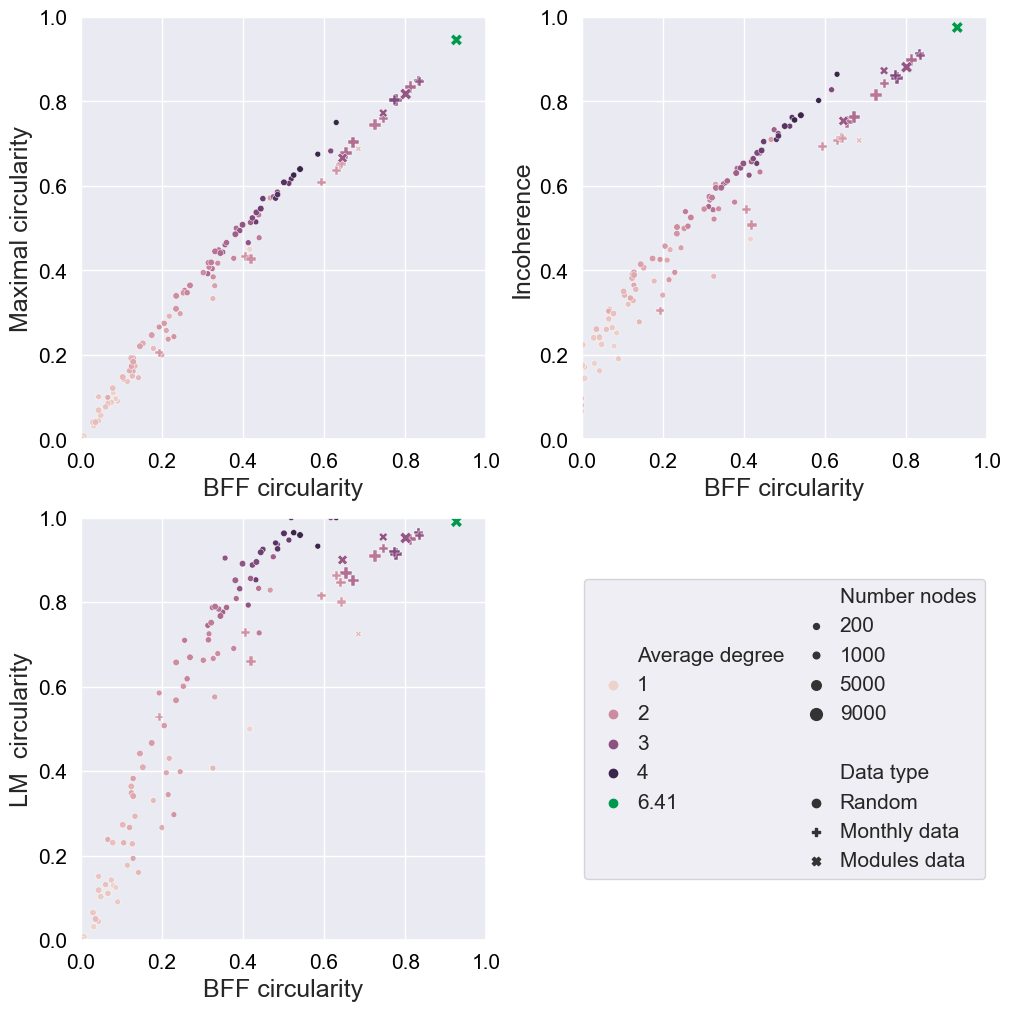

In [55]:
x_y = [('BFF', 'max',(0,0)), ('BFF','incoherence',(0,1)), ('BFF', 'All cycle edges',(1,0))]
#label_map = {'BFF' : 'BFF', 'max' : 'Maximal', 'incoherence' : 'Incoherence', 'All cycle edges' : 'All cycle edges'}
label_map = {'BFF' : 'BFF circularity', 'max' : 'Maximal circularity', 'incoherence' : 'Incoherence', 'All cycle edges' : 'LM  circularity'}


fig, ax = plt.subplots(2, 2, figsize = (10,10), constrained_layout=True)

for x,y,i in x_y:
    sns.scatterplot(ax = ax[i], data=exps_plot, x=x, y=y, hue="average_degree", size = 'num_nodes', style = 'type', 
    hue_norm=hue_norm, size_norm = size_norm, markers = markers, palette = newcmp) 
    ax[i].set_xlabel(label_map[x], fontsize = font_size_lable)
    ax[i].set_ylabel(label_map[y], fontsize = font_size_lable) 
    ax[i].tick_params(axis= 'both',  labelsize =  font_size_ticks, colors = color_box, which = 'both' )
    ax[i].set(ylim=(0, 1), xlim = (0,1))

for _, _, ax_index in x_y:
    ax[ax_index].get_legend().set_visible(False)

ax[(1,1)].axis('off')
ax[(1,1)].legend(handles, labels,  loc="center", fontsize = font_size_legend, ncol = 2, columnspacing=0.5, handletextpad=0.15)
    
# Saving figure
path_figure = os.path.join(dir_figures, "Figure5.pdf")
plt.savefig(path_figure, format='pdf',bbox_inches='tight')

plt.show()
